In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/ds_tools_api/ml/reviews_labeled.csv", encoding='ISO-8859-1')  # or 'latin1'

In [3]:
df.head()

,asin,title,comment,rate,helpful_votes,review_date,is_verified_purchase,positive_score,negative_score,sentiment
0,B0CL5KNB9M,PlayStation 5 Digital Edition Fortnite Cobalt...,recently purchased playstation pro digital edi...,5,6 people found this helpful,"Reviewed in the United States on December 7, 2024",True,1.491977,0.091272,positive
1,B0CL5KNB9M,Fives No Jive,longtime playstation fan putting getting ps th...,5,551 people found this helpful,"Reviewed in the United States on June 8, 2024",True,0.566011,0.305461,positive
2,B0CL5KNB9M,PlayStation5 Console Slim Review,playstation console slim fantastic evolution o...,5,94 people found this helpful,"Reviewed in the United States on November 15, ...",True,0.845969,0.000000,positive
3,B0CL5KNB9M,Compact Sleek and Reliable,ps digital slim worked flawlessly compact desi...,5,NaN,"Reviewed in the United States on December 11, ...",True,1.229438,0.000000,positive
4,B0CL5KNB9M,works great,turn clean shiny fast load thing astros playro...,5,19 people found this helpful,"Reviewed in the United States on November 29, ...",True,0.560571,0.320713,positive


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download required resources
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
import pandas as pd
from datetime import datetime

In [7]:
# Regex to extract the date part from the string
df['extracted_date'] = df['review_date'].str.extract(r'on (.+)$')

In [8]:
# Convert extracted date to datetime format
df['timestamp'] = pd.to_datetime(df['extracted_date'])

In [9]:
df.head()

,asin,title,comment,rate,helpful_votes,review_date,is_verified_purchase,positive_score,negative_score,sentiment,extracted_date,timestamp
0,B0CL5KNB9M,PlayStation 5 Digital Edition Fortnite Cobalt...,recently purchased playstation pro digital edi...,5,6 people found this helpful,"Reviewed in the United States on December 7, 2024",True,1.491977,0.091272,positive,"December 7, 2024",2024-12-07
1,B0CL5KNB9M,Fives No Jive,longtime playstation fan putting getting ps th...,5,551 people found this helpful,"Reviewed in the United States on June 8, 2024",True,0.566011,0.305461,positive,"June 8, 2024",2024-06-08
2,B0CL5KNB9M,PlayStation5 Console Slim Review,playstation console slim fantastic evolution o...,5,94 people found this helpful,"Reviewed in the United States on November 15, ...",True,0.845969,0.000000,positive,"November 15, 2024",2024-11-15
3,B0CL5KNB9M,Compact Sleek and Reliable,ps digital slim worked flawlessly compact desi...,5,NaN,"Reviewed in the United States on December 11, ...",True,1.229438,0.000000,positive,"December 11, 2024",2024-12-11
4,B0CL5KNB9M,works great,turn clean shiny fast load thing astros playro...,5,19 people found this helpful,"Reviewed in the United States on November 29, ...",True,0.560571,0.320713,positive,"November 29, 2024",2024-11-29


In [10]:
if 'timestamp' in df.columns:
    print(df['timestamp'])
else:
    print("Column 'timestamp' does not exist.")

0      2024-12-07
1      2024-06-08
2      2024-11-15
3      2024-12-11
4      2024-11-29
          ...    
2041   2019-06-20
2042   2018-07-15
2043   2017-08-05
2044   2016-09-01
2045   2020-10-25
Name: timestamp, Length: 2046, dtype: datetime64[ns]


In [11]:
df.dtypes

asin                            object
title                           object
comment                         object
rate                             int64
helpful_votes                   object
review_date                     object
is_verified_purchase              bool
positive_score                 float64
negative_score                 float64
sentiment                       object
extracted_date                  object
timestamp               datetime64[ns]
dtype: object

In [12]:
from datetime import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [13]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download stopwords if not already downloaded
if not nltk.download('stopwords'):
    nltk.download('stopwords')


# Check the columns of the dataframe to make sure 'comment' column exists
print("Columns in the DataFrame:", df.columns)

# Function to clean text
def clean_text(text):
    # Ensure the text is a string before cleaning
    if isinstance(text, str):
        # Remove special characters, HTML tags, and numbers
        text = re.sub(r'<[^>]*>|[\W_]+|\d+', ' ', text).lower()

        # Tokenize and remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in text.split() if word not in stop_words]

        # Join words back into a single string
        return ' '.join(words)
    return ''  # Return an empty string if the input is not a valid string

# Apply cleaning to the 'comment' column (adjust 'comment' to the actual column name in your CSV)
df['Cleaned_Text'] = df['comment'].apply(clean_text)

# Check if the 'Cleaned_Text' column is created
print("Columns after cleaning:", df.columns)

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def get_sentiment_score(text):
    if isinstance(text, str):  # Ensure the text is a string before analyzing sentiment
        sentiment = sia.polarity_scores(text)
        return sentiment['compound']  # Compound score is a good overall metric
    return 0  # Return 0 for non-string values

# Apply sentiment analysis
df['Sentiment_Score'] = df['Cleaned_Text'].apply(get_sentiment_score)

# Display the DataFrame
print(df['Sentiment_Score'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Columns in the DataFrame: Index(['asin', 'title', 'comment', 'rate', 'helpful_votes', 'review_date',
       'is_verified_purchase', 'positive_score', 'negative_score', 'sentiment',
       'extracted_date', 'timestamp'],
      dtype='object')
Columns after cleaning: Index(['asin', 'title', 'comment', 'rate', 'helpful_votes', 'review_date',
       'is_verified_purchase', 'positive_score', 'negative_score', 'sentiment',
       'extracted_date', 'timestamp', 'Cleaned_Text'],
      dtype='object')
0       0.9914
1       0.9896
2       0.9628
3       0.6697
4       0.0000
         ...  
2041    0.6369
2042    0.7845
2043   -0.3182
2044    0.4588
2045    0.7906
Name: Sentiment_Score, Length: 2046, dtype: float64


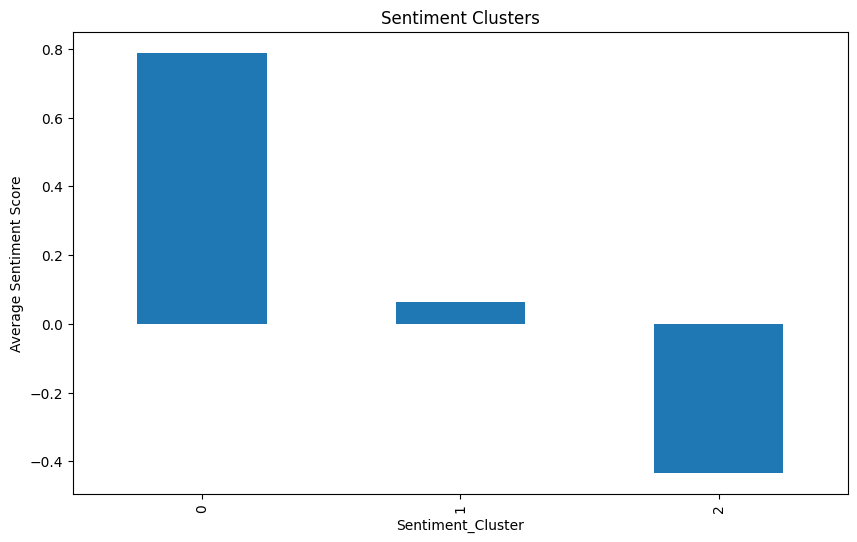

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Reshape the sentiment scores for clustering
sentiment_scores = df['Sentiment_Score'].values.reshape(-1, 1)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
df['Sentiment_Cluster'] = kmeans.fit_predict(sentiment_scores)

# Visualize clusters
df.groupby('Sentiment_Cluster')['Sentiment_Score'].mean().plot(kind='bar', figsize=(10,6), title='Sentiment Clusters')
plt.ylabel('Average Sentiment Score')
plt.show()


In [15]:
correlation = df['Sentiment_Score'].corr(df['rate'])
print(f"Correlation between Sentiment Score and Rating: {correlation}")

Correlation between Sentiment Score and Rating: 0.6854851548577701


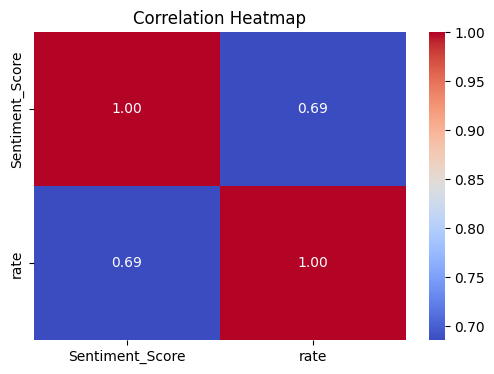

In [16]:
import seaborn as sns
corr = df[['Sentiment_Score', 'rate']].corr()

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

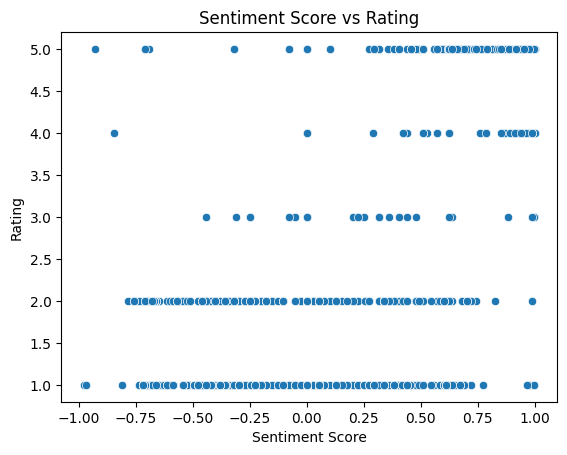

In [17]:
sns.scatterplot(data=df, x='Sentiment_Score', y='rate')
plt.title('Sentiment Score vs Rating')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.show()

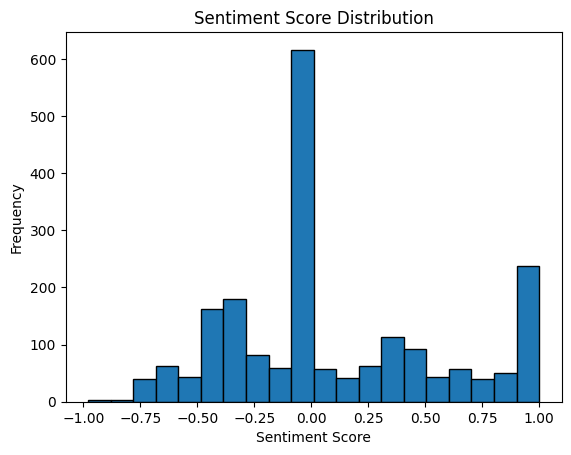

In [18]:
import matplotlib.pyplot as plt

# Plot histogram to see the distribution
plt.hist(df['Sentiment_Score'], bins=20, edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()
